# Episode Length

## Package Importing

In [ ]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import SplineTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [3]:
# ——— load ———
df_train = pd.read_csv('../data/raw/train.csv', index_col='id')
df_test  = pd.read_csv('../data/raw/test.csv')

# ——— prepare X/y ———
X_train = df_train[['Episode_Length_minutes']]
y_train = df_train['Listening_Time_minutes']

X_test  = df_test[['Episode_Length_minutes']]

## Data Importing

In [ ]:
# ——— build pipeline with a mean‐imputer ———
spline_model = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SplineTransformer(degree=3, n_knots=5, extrapolation='constant'),
    LinearRegression()
)

scores = -1 * GridSearchCV(
    estimator=spline_model,
    X=X_train,
    y=y_train,
    cv=10,
    scoring='neg_root_mean_squared_error'
) 



print(scores.mean());

/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ co

13.556520728216935


/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


np.float64(13.556520728216935)

In [ ]:


# ——— fit & predict ———
spline_model.fit(X_train, y_train)
y_pred = spline_model.predict(X_test)

predictions = pd.Series(y_pred)

submission = (
    pd.concat([df_test.id,predictions],axis=1)
        .rename(columns={0:'Listening_Time_minutes'})
)

print(submission)

# write the csv to the submissions folder
submission.to_csv(
    './submissions/spline_episode_name_prediction.csv',
    index=False
)

## Visualisation

In [27]:
df_length_and_listening = (
    df
        .loc[:,['Listening_Time_minutes','Episode_Length_minutes']]
        .dropna()
)

<Axes: xlabel='Listening_Time_minutes', ylabel='Episode_Length_minutes'>

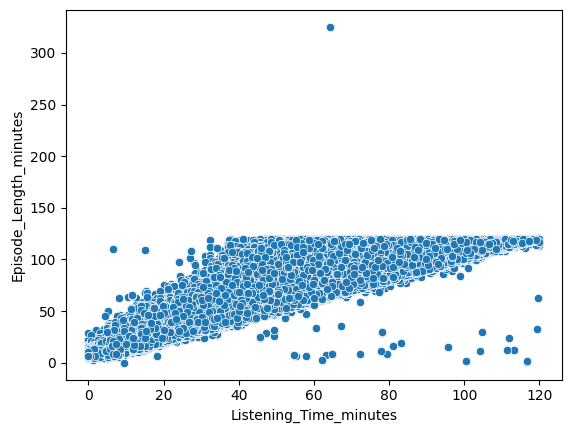

In [28]:
sns.scatterplot(
    data=df_length_and_listening,
    x='Listening_Time_minutes',
    y='Episode_Length_minutes'
)

In [6]:
train_data.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/cbutler/repos/personal_repos/Kaggle_S5E4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


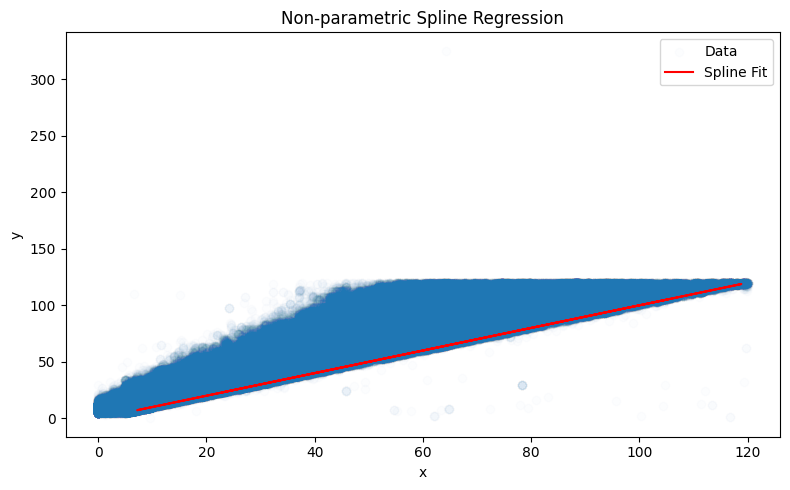

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression

# ——— Prepare your data ———
# Example DataFrame `df` with columns 'x' and 'y':
# Replace this with your actual data loading step.
# df = pd.read_csv('your_data.csv')
# For demonstration, we'll generate some sample data:

X = df_length_and_listening['Listening_Time_minutes'].to_numpy().reshape(-1, 1)
y = df_length_and_listening['Episode_Length_minutes'].to_numpy()

# ——— Build the spline‑regression pipeline ———
spline_model = make_pipeline(
    SplineTransformer(degree=3, n_knots=5, include_bias=False),
    LinearRegression()
)

# ——— Fit to your data ———
spline_model.fit(X, y)

# ——— Predict new values ———
# x_new = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred = spline_model.predict(X)

# ——— Plot original data and spline fit ———
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label='Data',alpha=0.01)
plt.plot(y_pred, y_pred, label='Spline Fit',color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non‑parametric Spline Regression')
plt.legend()
plt.tight_layout()
plt.show()
